# Data Science Algorithms Project - Stroke Prediction

Name: William Egesdal

## Description

### Purpose

This project uses a dataset of health data to make predictions about the risk of stroke.


### Regression or Classification?

This is a classification project because the outcome is either "yes" or "no" (they have a stroke). This is also referred to as a qualitative response variable. We will make a prediction whether or not someone will have a stroke.

### Motivation

Stroke is the second leading cause of death worldwide. By examining the variety of factors involved, we can make better predictions about a person's likelyhood of getting a stroke.

## Data

### Source

Title: Stroke Prediction Dataset
Subtitle: 11 clinical features por predicting stroke events
Author: fedesoriano
URL: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


In [123]:
import pandas as pd

In [124]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [125]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [126]:
df.shape

(5110, 12)

### Data Size

rows: 5110
columns: 12

### Count NaNs

The first thing I did was count the NaNs to get a feel for how much data cleaning would be necessary. The only field that had NaNs was bmi. There were 201 missing values here. I checked the total length of the dataframe, which was 5110 samples.

In [128]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [129]:
df.shape[0]

5110

### Data Types

The next thing I did was to check the data types present in the dataframe to determine if any modifications were necessary. The gender, work_type, residence_type, and smoking_status fields should all be categorical. hypertension, heart_disease, and ever_married should be Boolean.

In [130]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [131]:
clean_df = df.astype({"gender":"category", "work_type":"category", "Residence_type":"category", "smoking_status":"category", "hypertension":"boolean", "heart_disease":"boolean"})

clean_df.ever_married = clean_df.ever_married.apply(lambda x: True if x == "Yes" else False)

clean_df.dtypes

id                      int64
gender               category
age                   float64
hypertension          boolean
heart_disease         boolean
ever_married             bool
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

## Investigate

Now I will do some grouping and exploration of the data to get an intuitive sense of what has been captured.

In [132]:
clean_df.groupby("gender").count().stroke

gender
Female    2994
Male      2115
Other        1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='gender,stroke'>

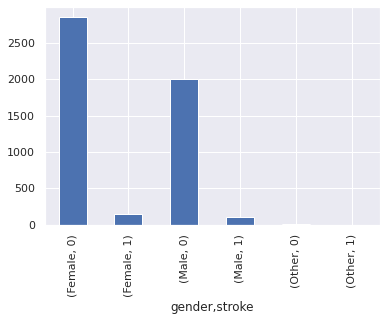

In [133]:
clean_df.groupby(["gender", "stroke"]).count().id.plot.bar()

#### Insight

Although there were more women in the dataset, the number of men and women who experienced strokes were about the same. This indicates that men are at a higher risk of having a stroke.

In [134]:
clean_df.groupby("age").count()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
age,,,,,,,,,,,
0.08,2,2,2,2,2,2,2,2,2,2,2
0.16,3,3,3,3,3,3,3,3,3,3,3
0.24,5,5,5,5,5,5,5,5,5,5,5
0.32,5,5,5,5,5,5,5,5,5,5,5
0.40,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
78.00,102,102,102,102,102,102,102,102,93,102,102
79.00,85,85,85,85,85,85,85,85,77,85,85
80.00,70,70,70,70,70,70,70,70,67,70,70


<AxesSubplot:xlabel='age'>

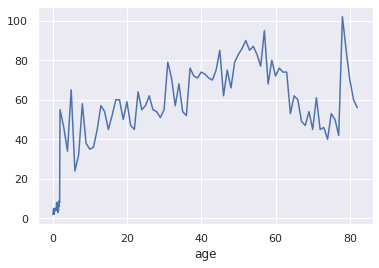

In [135]:
clean_df.groupby(["age"]).stroke.count().plot()

#### Insight

The ages of the sample population are evenly distributed as seen in the above chart.

In [136]:
clean_df.groupby(["age"]).stroke.sum()

age
0.08      0
0.16      0
0.24      0
0.32      0
0.40      0
         ..
78.00    21
79.00    17
80.00    17
81.00    14
82.00     9
Name: stroke, Length: 104, dtype: int64

<AxesSubplot:xlabel='age'>

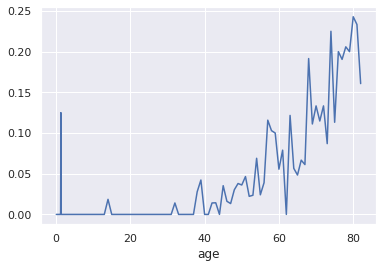

In [137]:
(clean_df.groupby(["age"]).stroke.sum() / clean_df.groupby(["age"]).stroke.count()).plot()

## Histogram of Parameter vs. Stroke

This series of histograms groups by a feature to determine the relative frequency of stroke vs. no stroke.

This will allow me to determine where there are differences between the relative frequency of stroke in the grouped sample for each predictor.

#### Insight

The frequency of strokes increases steadily with age, with some outliers in very early life.

<AxesSubplot:xlabel='hypertension'>

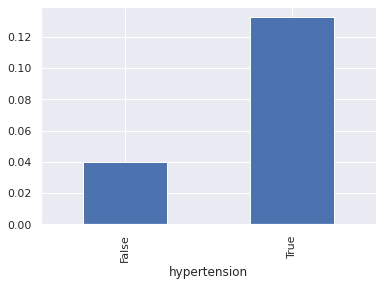

In [138]:
(clean_df.groupby(["hypertension"]).stroke.sum() / clean_df.groupby(["hypertension"]).stroke.count()).plot.bar()

Hypertension (High Blood Pressure) seems to be a strong predictor of stroke.

<AxesSubplot:xlabel='heart_disease'>

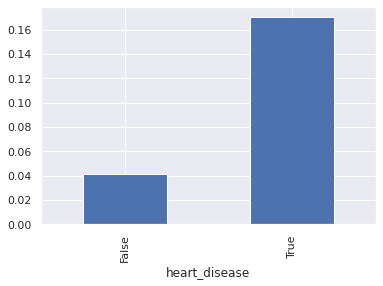

In [139]:
(clean_df.groupby(["heart_disease"]).stroke.sum() / clean_df.groupby(["heart_disease"]).stroke.count()).plot.bar()

Similarly to hypertension, it makes intuitive sense that heart disease would be coindicated with stroke risk.

<AxesSubplot:xlabel='ever_married'>

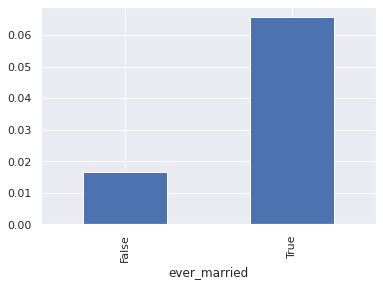

In [140]:
(clean_df.groupby(["ever_married"]).stroke.sum() / clean_df.groupby(["ever_married"]).stroke.count()).plot.bar()

It is curious that being married would affect your risk of getting a stroke. Perhaps men (who are more likely to experience stroke anyway) are more likely to exercise and practice healthy behaviors without a spouse. The correlation matrix seems to bear this out as well, where married people are correlated with higher BMI.

<AxesSubplot:xlabel='work_type'>

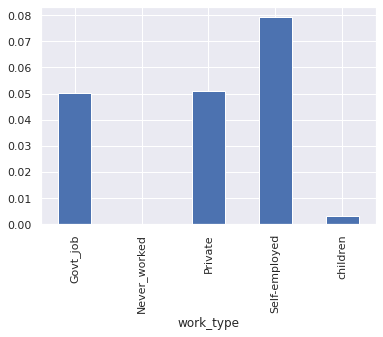

In [141]:
(clean_df.groupby(["work_type"]).stroke.sum() / clean_df.groupby(["work_type"]).stroke.count()).plot.bar()

<AxesSubplot:xlabel='Residence_type'>

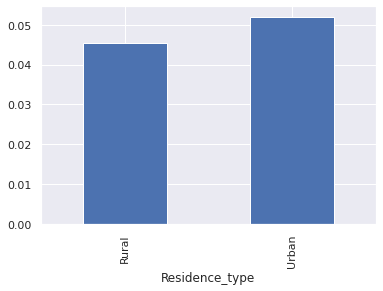

In [142]:
(clean_df.groupby(["Residence_type"]).stroke.sum() / clean_df.groupby(["Residence_type"]).stroke.count()).plot.bar()

Type of residence does not seem to be a significant factor in frequency of stroke in this data.

<AxesSubplot:xlabel='smoking_status'>

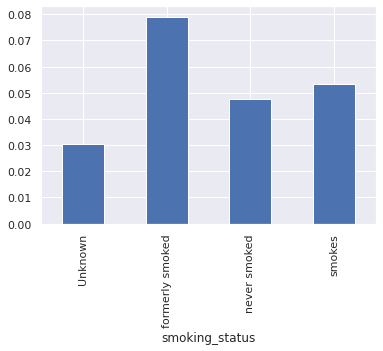

In [143]:
(clean_df.groupby(["smoking_status"]).stroke.sum() / clean_df.groupby(["smoking_status"]).stroke.count()).plot.bar()

It is interesting that the "formerly smoked" category seems to come with a greater risk of stroke than current smokers. A confounding variable in this is that "former smokers" are perhaps more likely to be older, or to have already experiences negative effects. A better metric might be "years smoked" because then we would not have people who just bought their first pack of cigarettes grouped with lifelong pack-a-day smokers.

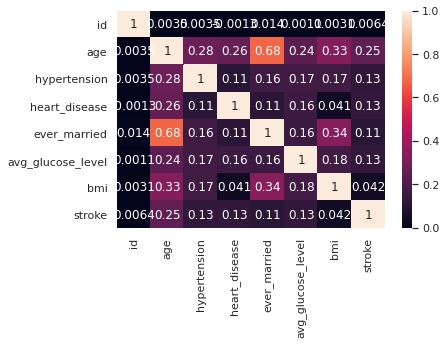

In [144]:
import seaborn as sns

clean_df_corr = clean_df.corr()
sns.heatmap(clean_df_corr, xticklabels=clean_df_corr.columns, 
            yticklabels=clean_df_corr.columns, annot=True);

There is some correlation between ever_married and age, which makes sense considering that people generally don't get married until adult age. There also appears to be a correlation between marriage and BMI, which makes intuitive sense. With respect to the focus of this project, stroke seems most correlated with age, which again makes sense based on what we have seen in other graphs.

## Plans for model approach.



I plan to use K-nearest neighbors to classify the patient as experiencing a stroke (or not)



In [145]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as plt
import seaborn as sns; sns.set()

## Data Cleaning Pt. II

The categorical attributes will need to be converted to numerical format to encode for machine learning. This is done using the OneHotEncoder module of the sklearn library.

In [146]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded_clean_df = onehot_encoder.fit_transform(clean_df[['gender', 'work_type', 'Residence_type', 'smoking_status']].dropna().to_numpy())

In [147]:
onehot_encoded_clean_df[:10]

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [148]:
new_df = pd.DataFrame(onehot_encoded_clean_df)

new_df.columns = onehot_encoder.get_feature_names()

new_df.columns

Index(['x0_Female', 'x0_Male', 'x0_Other', 'x1_Govt_job', 'x1_Never_worked',
       'x1_Private', 'x1_Self-employed', 'x1_children', 'x2_Rural', 'x2_Urban',
       'x3_Unknown', 'x3_formerly smoked', 'x3_never smoked', 'x3_smokes'],
      dtype='object')

In [223]:
z = clean_df.drop(['gender', 'work_type', 'Residence_type', 'smoking_status', 'id'], axis=1)

final_df = pd.concat([z, new_df], axis=1)

In [224]:
final_df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'x0_Female', 'x0_Male',
       'x0_Other', 'x1_Govt_job', 'x1_Never_worked', 'x1_Private',
       'x1_Self-employed', 'x1_children', 'x2_Rural', 'x2_Urban', 'x3_Unknown',
       'x3_formerly smoked', 'x3_never smoked', 'x3_smokes'],
      dtype='object')

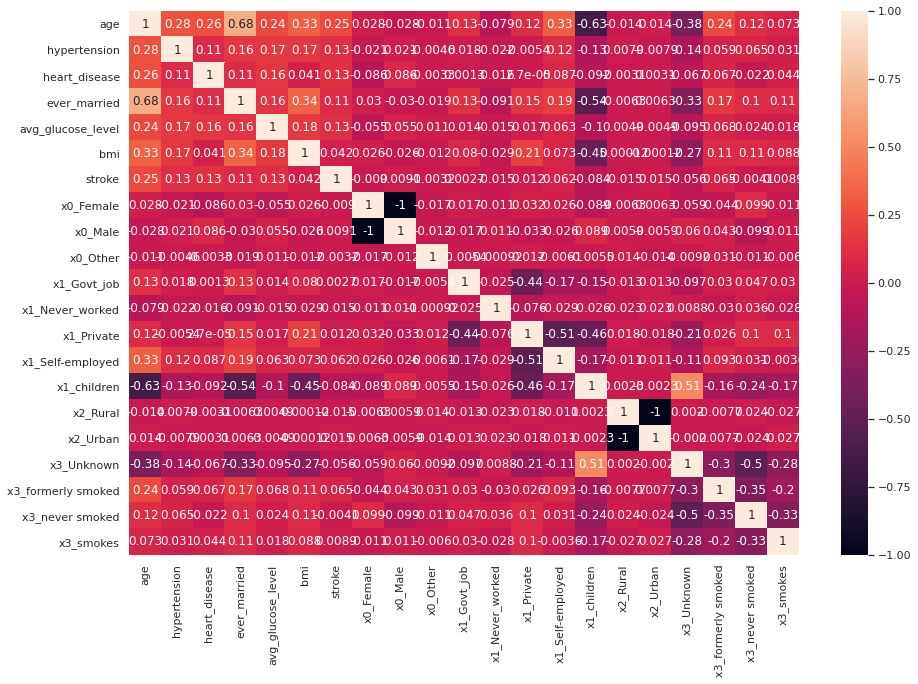

In [227]:
final_df_corr = final_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(final_df_corr, xticklabels=final_df_corr.columns, 
            yticklabels=final_df_corr.columns, annot=True, ax =ax);

## Colinearity

Examining the column labels shows that we must address colinearity in the gender column (a male is not a female so this data is encoded twice). We can do this by simply dropping the male column.

In [201]:
final_df = final_df.drop('x0_Male', axis=1)

In addition, we can observe from the convolution matrix that ever_married is correlated with age. ever_married is also slightly correlated with BMI. I will drop ever_married from the data to address this potential issue.

In [202]:
final_df = final_df.drop('ever_married', axis=1)

Finally, the x3_Unknown column is correlated with the x1_children parameter. I will also drop the x3_Unknown column to address this colinearity issue.

In [229]:
final_df = final_df.drop('x3_Unknown', axis=1)

# Results

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

y = final_df.dropna()['stroke'].to_numpy()
X = final_df.dropna().drop('stroke', axis=1).to_numpy()

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [231]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(3)

knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

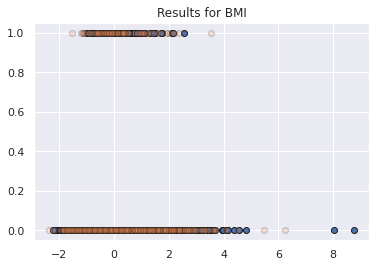

In [232]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, 1, 1)
ax.set_title("Results for BMI")
ax.scatter(X_train[:, 5], y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 5], y_test, cmap=cm_bright, alpha=0.2, edgecolors='k')

In [233]:
knc.fit(X_train, y_train)
score = knc.score(X_test, y_test)
score

0.9547861507128309

In [234]:
metrics.confusion_matrix(y_test, knc.predict(X_test))

array([[2341,    8],
       [ 103,    3]])

This classifier, although good in accuracy, is not a good predictor of whether someone will have a stroke or not. In addition, a KNN classifier will not allow us to make inferences about the significance of which factors are more significant in determining a patient's stroke risk. Essentially the classifier only correctly predicted a stroke twice. In 21 cases the classifier incorrectly stated that someone would have a stroke when they didn't and in 94 cases it said the person wouldn't have a stroke when they actually did.

In [235]:
import sklearn.linear_model

lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train, y_train)

metrics.confusion_matrix(y_test, lr.predict(X_test))


array([[2349,    0],
       [ 106,    0]])

The confusion matrix shows that my Logistic Regression classifier has 0 false positives, 95 false negatives, and 1 true positive predicted.

In [236]:
lr.score(X_test, y_test)

0.9568228105906313

The accuracy looks good on paper, but there is a problem with my model. It is basically classifying everyone as not having a stroke. This is because the dataset is unbalanced.

In [237]:
lrb = sklearn.linear_model.LogisticRegression(class_weight='balanced')
lrb.fit(X_train, y_train)

metrics.confusion_matrix(y_test, lrb.predict(X_test))

array([[1744,  605],
       [  25,   81]])

In [238]:
lrb.score(X_test, y_test)

0.7433808553971487

By balancing the weights of the classes, we get a less accurate but potentially more useful model. This model only has 28 false negatives (and 609 false positives). For a medical test, this is preferable since the consequences of misclassifying a patient as a non-stroke risk are higher. On the one hand, a patient who is directed to make healthier choices will benefit whether they are truly at risk or not, telling someone they aren't a stroke risk when they actually are could be deadly.

Linear discriminant analysis is better at dealing with unbalanced parameters in classification according to the textbook.

In [239]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.score(X_test, y_test)


0.9539714867617108

In [240]:
metrics.confusion_matrix(y_test, lda.predict(X_test))

array([[2336,   13],
       [ 100,    6]])

In [241]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.9535641547861508

In [242]:
metrics.confusion_matrix(y_test, lda.predict(X_test))

array([[2337,   12],
       [ 102,    4]])

In most cases, the models have a high number of false negatives, which as discussed is undesirable given the consequences of underdiagnosis being high.

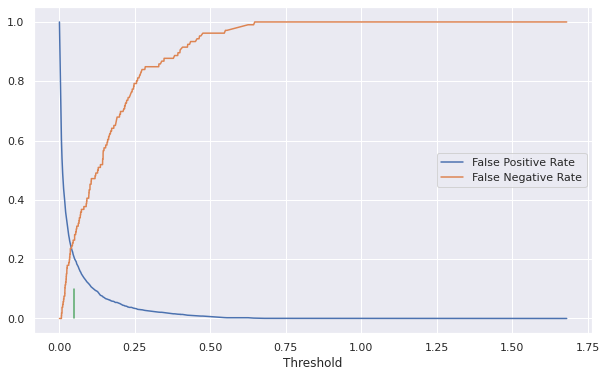

In [243]:
# https://towardsdatascience.com/how-to-deal-with-imbalanced-classification-without-re-balancing-the-data-8a3c02353fe3

predtst=lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.05,0.05],[0,0.1])

Observing a ROC chart of the False Positive and False Negative rates will allow us to make an informed decision regarding the decision threshold. We will want to select a threshold (marked with a green line) that minimizes both.

In [245]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.05, 1, 0)
cf = metrics.confusion_matrix(y_test, hardpredtst_tuned_thresh)
cf

array([[1862,  487],
       [  28,   78]])

One way to adjust the false negative rate is to choose a different threshold for classification. This is appropriate when dealing with an unbalanced dataset such as mine. In this data, there were significantly more people who did not have a stroke than that did, so making adjustments to the decision threshold is appropriate. In addition, the consequences for a false negative are higher than for a false positive, which further justifies focusing on false negative as a measure of success.

For the threshold adjusted LDA model, we can observe an accuracy of

In [246]:
(cf[0][0] + cf[1][1]) / (cf[0][0] + cf[0][1] + cf[1][0] + cf[1][1])

0.790224032586558

It only has 19 false negatives, which we could reduce further by adjusting the decision threshold lower if that was deemed necessary. That said, the balanced Logistic Regression model also had 28 false negatives, with fewer false positives. That makes me think that the Logistic Regression model could be better with some adjustments.

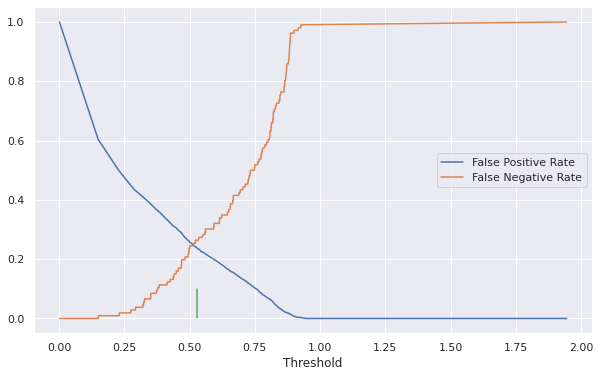

In [259]:
predtst=lrb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.53,0.53],[0,0.1])

In [260]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.53, 1, 0)
cf = metrics.confusion_matrix(y_test, hardpredtst_tuned_thresh)
cf

array([[1796,  553],
       [  28,   78]])

In [261]:
(cf[0][0] + cf[1][1]) / (cf[0][0] + cf[0][1] + cf[1][0] + cf[1][1])

0.7633401221995927

Adjusting the threshold of the balanced Logistic Regression model to the same number of false negatives as the LDA model produced more false positives. I can conclude that the LDA model is superior in this case. In the words of the late, great Regis Philbin, this is my final answer.